<a href="https://colab.research.google.com/github/Harini26-eng/CODSOFT/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix , ConfusionMatrixDisplay

In [ ]:
data_set = pd.read_csv('/content/churn_prediction.csv')

In [ ]:
data_set.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_set.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data_set.shape

(10000, 14)

In [ ]:
is_Exited = data_set["Exited"].value_counts()
print("Yes: ",is_Exited[1])
print("No: ",is_Exited[0])


Yes:  2037
No:  7963


In [ ]:

print(data_set.isna().sum().sum())
print(data_set.duplicated().sum())

0
0


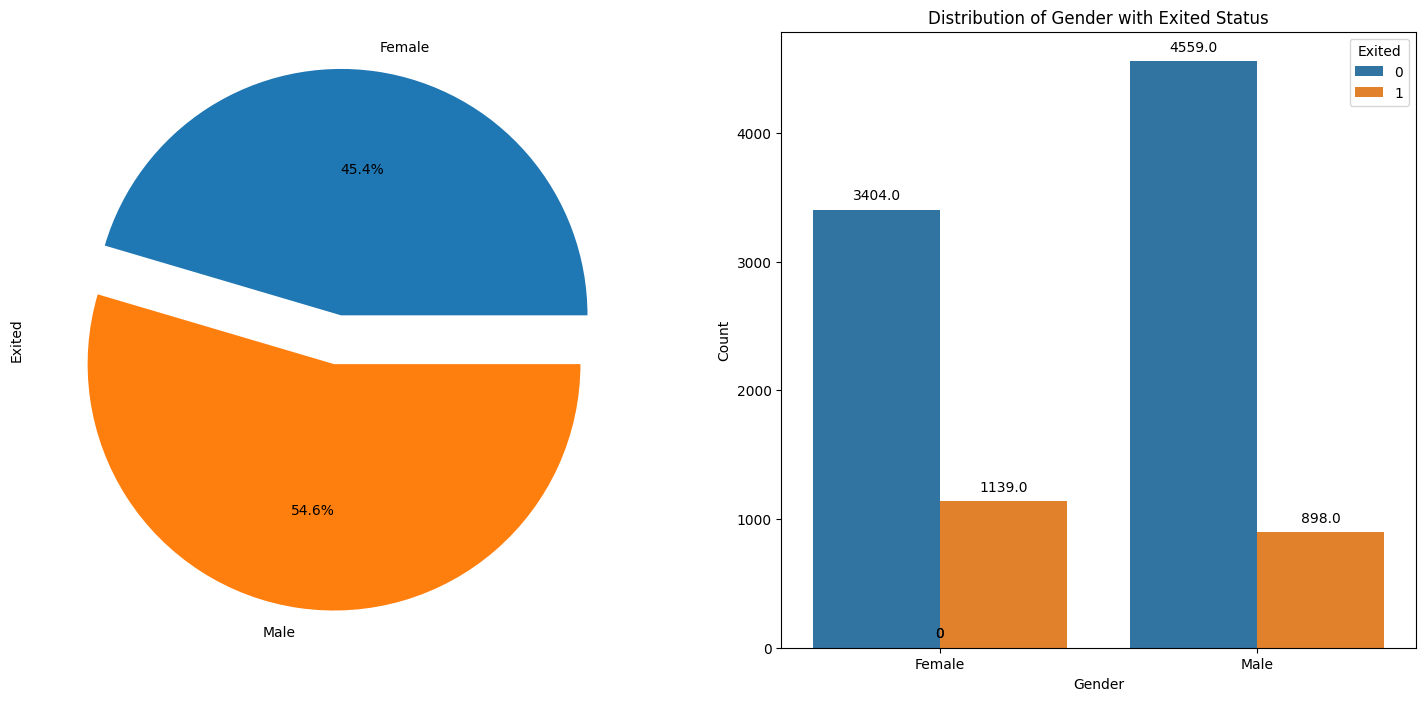

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(18, 8))

#Gender Distribution
explode = [0.1, 0.1]
data_set.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="Gender", hue="Exited", data=data_set,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

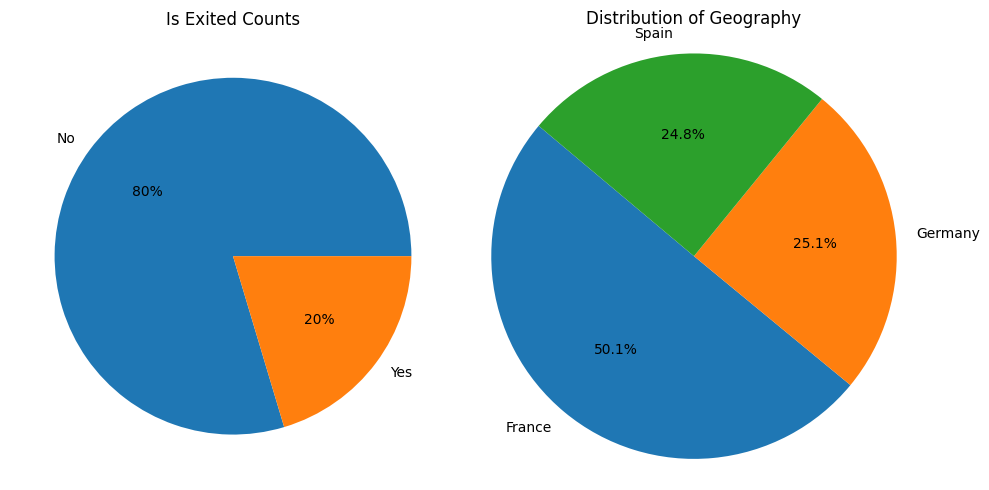

In [ ]:
# Exited Counts Pie Chart
is_Exited = data_set["Exited"].value_counts()
plt.figure(figsize=(10, 5))  # Set the same figsize for both plots
plt.subplot(1, 2, 1)  # Subplot for the Exited Counts pie chart
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%")
plt.title("Is Exited Counts")

# Distribution of Geography Pie Chart
plt.subplot(1, 2, 2)  # Subplot for the Distribution of Geography pie chart
geography_counts = data_set['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Geography')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

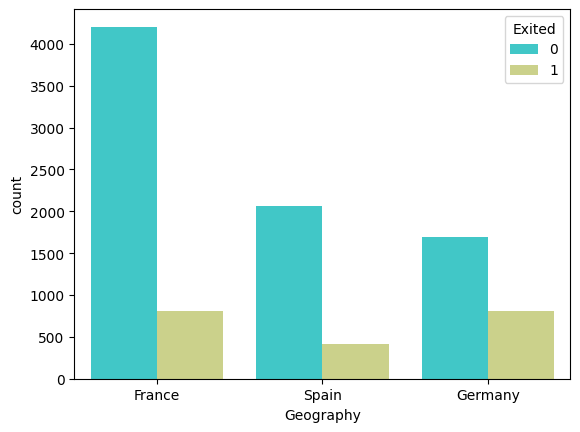

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=data_set, palette='rainbow')

In [ ]:
data_set = data_set.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

data_set['Balance'] = data_set['Balance'].astype(int)
data_set['EstimatedSalary'] = data_set['EstimatedSalary'].astype(int)

In [ ]:
# Initialize label encoders
le = LabelEncoder()
# Fit and transform the data
data_set['Gender'] = le.fit_transform(data_set['Gender'])
data_set['Geography'] = le.fit_transform(data_set['Geography'])

In [ ]:
No_class = data_set[data_set["Exited"]==0]
yes_class = data_set[data_set["Exited"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

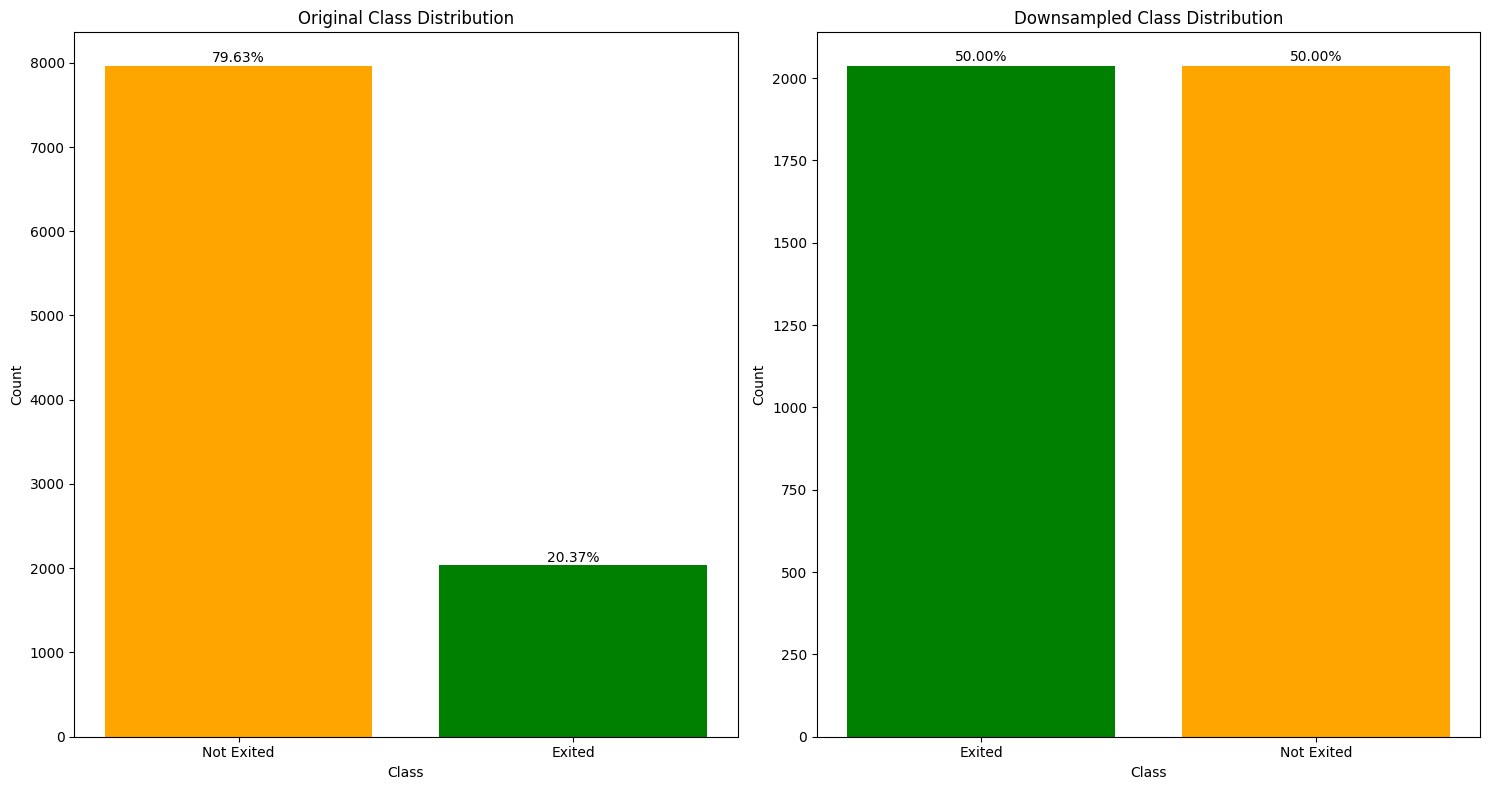

In [ ]:
# Count the occurrences of each class in the original dataset
original_class_counts = data_set["Exited"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["Exited"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(data_set) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(15, 8))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Not Exited', 'Exited'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Exited', 'Exited'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()


In [ ]:
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       410
           1       0.76      0.77      0.77       405

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815

Random Forest model accuracy is: 76.69%


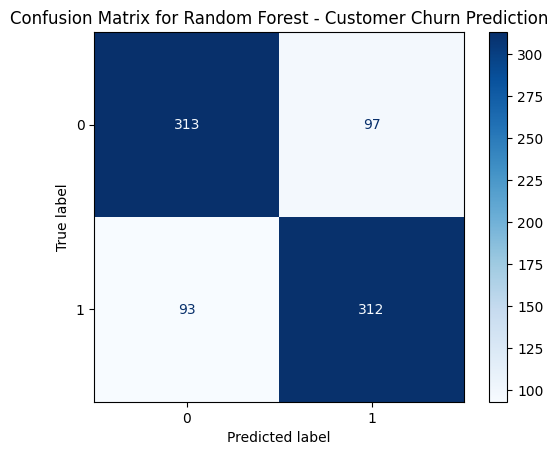

In [ ]:
# Compute and display the confusion matrix
cm = confusion_matrix(y_test, predict_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest - Customer Churn Prediction')
plt.show()